
### Homework: Clustering Analysis on a Customers Dataset
Consider that you possess a dataset of customer information, and your task is to perform customer segmentation on this historical data. Customer segmentation involves dividing a customer base into distinct groups based on shared characteristics. This approach is crucial because it allows a business to target specific groups effectively and optimize the allocation of marketing resources. For instance, one segment might consist of high-profit, low-risk customers—those more likely to make purchases or subscribe to services, whom the business aims to retain. Another segment could be customers from non-profit organizations, among others.

In this assignment, you will perform clustering analysis on the Mall Customers Dataset. This dataset includes the `Age`, `Annual Income`, and `Spending Score` of customers. You will use K-Means and DBSCAN clustering algorithms to segment customers based on their behaviors and traits. The primary objective is to understand customer segments to tailor marketing strategies effectively.

---

#### Step 1: Data Loading and Initial Exploration

**Exercise 1:**
- Load the Mall Customers dataset from the following URL: 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'.
- Use pandas to read the data and display the first few rows. 
- Generate basic statistics of the data using `.describe()`.


In [1]:
import pandas as pd
import io
import requests

# Load the data
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'

s = requests.get(url).content
mall_customers = pd.read_csv(io.StringIO(s.decode('utf-8')))
# Write your code here

df_cleaned = mall_customers.dropna()


# Display the first few rows of the dataset
#mall_customers.head()

# Generate basic statistics of the data
#mall_customers.describe()

print("First few rows of the dataset:")
print(df_cleaned.head(10))

print("\nBasic statistics of the data:")
print(df_cleaned.describe())



First few rows of the dataset:
    Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0             1   41    2               6      19      0.124       1.073   
1             2   47    1              26     100      4.582       8.218   
2             3   33    2              10      57      6.111       5.802   
3             4   29    2               4      19      0.681       0.516   
4             5   47    1              31     253      9.308       8.908   
6             7   38    2               4      56      0.442       0.454   
7             8   42    3               0      64      0.279       3.945   
9            10   47    3              23     115      0.653       3.947   
10           11   44    3               8      88      0.285       5.083   
12           13   24    1               7      18      0.526       0.643   

    Defaulted Address  DebtIncomeRatio  
0         0.0  NBA001              6.3  
1         0.0  NBA021             12.8  
2        

Here I have read in the dataset and printed out the first 10 rows (using .head(10)) and printed out basic statistics of the dataset (using .describe()).

#### Step 2: Data Preprocessing

**Exercise 2:**
- As observed, the "Address" field in this dataset is a categorical variable. The k-means algorithm, which relies on Euclidean distance, isn't suitable for categorical data because this type of distance measure doesn't make sense for discrete variables. Therefore, exclude this feature and proceed with the clustering analysis.
- Now  normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.





In [2]:
from sklearn.preprocessing import StandardScaler

# Write your code here

mall_customers_dropped_columns = df_cleaned.drop(['Address', 'Defaulted', 'Customer Id'], axis=1)


scaler = StandardScaler()

normalized_df = scaler.fit_transform(mall_customers_dropped_columns)
normalized_df = pd.DataFrame(normalized_df, columns=mall_customers_dropped_columns.columns)



print(normalized_df.head(10))




        Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0  0.768304  0.298793       -0.359007 -0.723102  -0.675699   -0.604284   
1  1.519090 -0.779325        2.647029  1.478707   1.431421    1.570620   
2 -0.232744  0.298793        0.242201  0.309845   2.154119    0.835201   
3 -0.733267  0.298793       -0.659610 -0.723102  -0.412427   -0.773833   
4  1.519090 -0.779325        3.398538  5.637681   3.665215    1.780653   
5  0.392911  0.298793       -0.659610  0.282663  -0.525393   -0.792705   
6  0.893435  1.376911       -1.260817  0.500125  -0.602437    0.269939   
7  1.519090  1.376911        2.196124  1.886450  -0.425662    0.270548   
8  1.143697  1.376911       -0.058403  1.152513  -0.599601    0.616341   
9 -1.358922 -0.779325       -0.208705 -0.750285  -0.485690   -0.735174   

   DebtIncomeRatio  
0        -0.580528  
1         0.372222  
2         1.559495  
3        -0.580528  
4        -0.448609  
5        -1.269440  
6        -0.536555  
7        -0.91765

Here I have normalised the dataset. I have also dropped the non-numerical columns (or columns with NaN values), which were 'Address', 'Defaulted', and 'Customer Id'. I used StandardScaler() to normalise the dataset with the dropped columns, and then printed out the first 10 rows. 

#### Step 3: Applying K-Means Clustering

**Exercise 3:**
- Apply K-Means clustering on the processed data. Choose a suitable number of clusters (start with `k=3`).
- Fit the model and then predict the cluster labels.
- Add these labels as a new column in the DataFrame and create a new DataFrame.
- Calculate the centroid value of each class.



In [3]:
from sklearn.cluster import KMeans

# Write your code here

#Applying K-means clustering
kmeans = KMeans(n_clusters=3)
#Fitting the model
kmeans.fit_predict(normalized_df)
#Predicting the cluster labels
labels = kmeans.labels_
#print('Cluster labels:', labels)

#Adding the cluster labels to the DataFrame
mall_customers_dropped_columns_kmeans = mall_customers_dropped_columns.copy() #making a copy of the data 
mall_customers_dropped_columns_kmeans['K-means Cluster'] = labels
print(mall_customers_dropped_columns_kmeans.head(10))

centroids = kmeans.cluster_centers_
print(centroids)





    Age  Edu  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio  \
0    41    2               6      19      0.124       1.073              6.3   
1    47    1              26     100      4.582       8.218             12.8   
2    33    2              10      57      6.111       5.802             20.9   
3    29    2               4      19      0.681       0.516              6.3   
4    47    1              31     253      9.308       8.908              7.2   
6    38    2               4      56      0.442       0.454              1.6   
7    42    3               0      64      0.279       3.945              6.6   
9    47    3              23     115      0.653       3.947              4.0   
10   44    3               8      88      0.285       5.083              6.1   
12   24    1               7      18      0.526       0.643              6.5   

    K-means Cluster  
0                 1  
1                 2  
2                 2  
3                 1  
4        

Here I applied K-means clustering on the processed data, with K=3 as my number of clusters. This value changed as I played around with the Silhouette score, however I landed ultimately on staying with K=3. I fit the model and predicted the cluster labels, which I added back onto the dataframe and printed out the first rows. I also calculated the centroids for each, printing them out below the dataframe.

**Exercise 4:**
- Plot the results using a scatter plot. Use `Age` as the x-axis and `Income` as the y-axis. Color the points based on the cluster labels.
- Interpret the plot. What does each cluster seem to represent in terms of customer behavior?


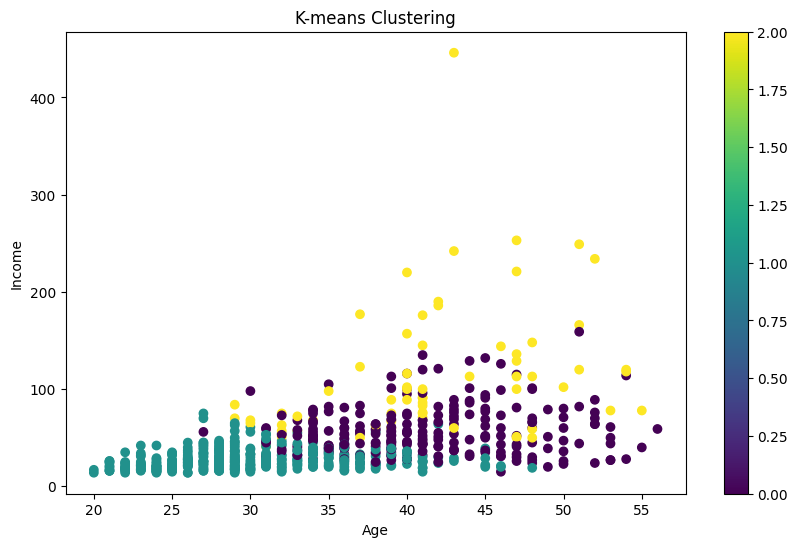

In [4]:
import matplotlib.pyplot as plt

# Write your code here

#scatter plot of kmean algorithm clustering analysis
plt.figure(figsize=(10, 6)) 
scatter = plt.scatter(mall_customers_dropped_columns_kmeans['Age'], 
                      mall_customers_dropped_columns_kmeans['Income'], 
                      c=mall_customers_dropped_columns_kmeans['K-means Cluster'], 
                      cmap='viridis')
plt.colorbar(scatter)



plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-means Clustering')
plt.show()


In this K-means clustering graph, I notice several things that show how this algorithm has segmented the data. K-means has divided the dataset into three distinct clusters, represented by purple, teal, and yellow points. These clusters appear to be primarily separated based on income levels, with some seperation across age groups as well. 

The purple cluster seems to represent the older age group, spanning across most incomes but concentrated in the higher part of the age axis. This would represent the older middle class customer base most likely. 

The teal cluster appears to capture the lower age range, overlapping with both the low and high-income clusters but maintaining a distinct presence in the lower age band. This would represent the younger, lower class customer base.

The yellow cluster represents the high-income group. This would represent the higher class/income, mainly older, customer base. 

There's significant overlap between these clusters, particularly in the lower and middle income ranges, which suggests a continuous rather than discrete distribution of incomes across ages. The algorithm has managed to incorporate the high-income outliers into the yellow cluster instead of treating them as separate entities.

Interestingly, the clusters span across all age groups, indicating that K-means found income to be a more distinguishing factor than age in this dataset. The gradual upward trend in the upper bounds of the clusters as age increases suggests a general correlation between age and maximum income, though with considerable variability.

#### Step 4: Applying DBSCAN Clustering

**Exercise 5:**
- Apply DBSCAN to the same dataset. Start with `eps=0.5` and `min_samples=5`.
- Fit the model and then predict the cluster labels.
- Determine the count of predicted classes. Adjust 'eps' and 'min_samples' to attain a total of three classes.
- Add these labels as a new column in your DataFrame and create a new DataFrame.

In [5]:
from sklearn.cluster import DBSCAN
import numpy as np


# Write your code here

#dbscan = DBSCAN(eps=0.5, min_samples=10)  #These parameters result in 3 clusters formed, however a negative silhouette score.

dbscan = DBSCAN(eps=0.9, min_samples=6)  #Parameters with the highest silhouette score acheived. 
cluster_labels = dbscan.fit_predict(normalized_df)  

mall_customers_dropped_columns_dbscan = mall_customers_dropped_columns.copy() #making a copy of the data 
mall_customers_dropped_columns_dbscan['DBSCAN Cluster'] = cluster_labels  #adding column to dataset with DBSCAN cluster labels

unique_clusters = np.unique(cluster_labels)
print("Initial number of clusters (including noise):", len(unique_clusters))  #For testing purposes, this gives you the number of clusters created by the algorithm

print(mall_customers_dropped_columns_dbscan.head(10)) 




Initial number of clusters (including noise): 5
    Age  Edu  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio  \
0    41    2               6      19      0.124       1.073              6.3   
1    47    1              26     100      4.582       8.218             12.8   
2    33    2              10      57      6.111       5.802             20.9   
3    29    2               4      19      0.681       0.516              6.3   
4    47    1              31     253      9.308       8.908              7.2   
6    38    2               4      56      0.442       0.454              1.6   
7    42    3               0      64      0.279       3.945              6.6   
9    47    3              23     115      0.653       3.947              4.0   
10   44    3               8      88      0.285       5.083              6.1   
12   24    1               7      18      0.526       0.643              6.5   

    DBSCAN Cluster  
0                0  
1               -1  
2       

Here I applied DBSCAN clustering to the dataset. I started with ep=0.5 and min_samples =5, however after some adjustments I landed on eps=0.9 and min_samples=6, as this would go on to produce the bese silhouette score. I fit the model and predicted the cluster labels. I adjusted the eps and min_samples values to get 3 clusters, but then ultimately decided to change them and include more clusters for the sake of the silhouette score. However, I have commented out the line that would give you that number of clusters as well. I added these new labels to the data frame and printed out the first rows. 

**Exercise 6:**
- Plot the results using the same scatter plot setup as in Exercise 4.
- Compare the results with K-Means. How does DBSCAN differ in terms of cluster formation?

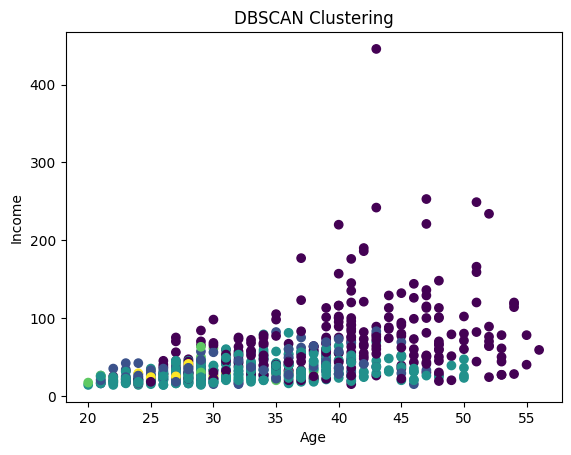

In [6]:
# Write your code here

plt.scatter(mall_customers_dropped_columns_dbscan['Age'], mall_customers_dropped_columns_dbscan['Income'], c=mall_customers_dropped_columns_dbscan['DBSCAN Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('DBSCAN Clustering')
plt.show()

DSCAN differs from K-means in terms of cluster formation in how it has primarily identified a single large cluster, represented by the purple points that dominate the graph. This main cluster spans across all age groups and income levels, suggesting that DBSCAN found the data to be largely continuous without clear density-based separations. There are points in blue and teal scattered throughout, which represent some of the other clusters found, and other green or yellow points which could be classified as noise by the algorithm. The presence of these points, particularly in the lower age and income ranges, indicates areas where the data density slightly differs from the main cluster. However, the overall result shows that DBSCAN struggled to meaningfully segment this dataset into distinct clusters. 

I would like to make a note that to obtain a silhouette score that was positive I had to adjsut the eps and min_samples parameters to the point where the best silhouette score was acheived, which caused there to be more than 3 clusters, which is more than was asked in the instructions. To obtain 3 clusters I would adjust the parameters to the amount shown in the commented code above, however that resulted in a negative silhouette score. 

#### Step 5: Evaluation and Interpretation

**Exercise 7:**
- Calculate and compare the silhouette scores for both K-Means and DBSCAN.
- Discuss the strengths and weaknesses of each clustering method based on the dataset and the results obtained.

In [7]:
from sklearn.metrics import silhouette_score

# Write your code here

silhouette_score_kmeans = silhouette_score(normalized_df, mall_customers_dropped_columns_kmeans['K-means Cluster'])
silhouette_score_dbscan = silhouette_score(normalized_df, mall_customers_dropped_columns_dbscan['DBSCAN Cluster'])

print(f"Silhouette Score for K-Means: {silhouette_score_kmeans}")
print(f"Silhouette Score for DBSCAN: {silhouette_score_dbscan}")





Silhouette Score for K-Means: 0.22164774815048738
Silhouette Score for DBSCAN: 0.042034450250540326


These Silhouette scores give some interesting insights about the clustering results. The K-Means score of 0.2139 is positive, telling me that K-Means has managed to identify some structure in the data. However, the score is relatively low on the -1 to 1 scale, suggesting that while there are clusters, they're not very well-separated. Moving on to the DBSCAN score of 0.042, its slightly more concerning. A  score like this implies that the algorithm has struggled to find meaningful clusters, and many data points might be in the wrong groups. Comparing the two, I can clearly see that K-Means has performed better here, but neither result is that good. This makes me wonder about the nature of the dataset - perhaps it doesn't have very distinct cluster structures naturally. However, for this particlar assignment the K-means algorithm silhouette score only got higher with fewer clusters, and this was the highest score I managed to acheive with the DBSCAN algorithm on this dataset.



#### Submission Instructions
Please submit your finished Jupyter Notebook with all exercises fully completed. Make sure to include comments in your code cells to clarify your thought process and results. Below each corresponding exercise, add your discussions in a "Markdown" section within this file.
